# [Chapter 5](https://pressbooks.bccampus.ca/thermo1/chapter/5-0-chapter-introduction-and-learning-objectives/)

## Question #11

A cylinder-piston system composed of aluminum contains $1\:kg$ of air at $1\:atm$. The whole system, including the weight of the air is $2\:kg$. The cylinder-piston system is initially in thermal equilibrium with the air. The temperature is then raised from $25\:^oC$ to $85\:^oC$.

a) Assuming the piston if fixed in place, determine how much heat is required to raise the temperature? What assumptions have been made for which equations? 

b) Now assume the piston is free to move allowing the air pressure to remain constant. How much heat is required to raise the temperature? Is this answer higher or lower than a), why? 

c) Now assuming the piston is allowed to move but is in contact with a spring with a constant of $100\:kN/m$. Determine how much heat is required for a piston with an $8\:cm$ diameter.

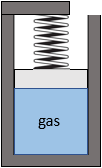

### Solution Approach for a)

Looking at the first law for air

$\Delta U=Q-W$

given the piston is fixed, boundry work ($W$) would be equal to zero then,

$Q=\Delta U$

and assuming ideal gas application for air

$Q=\Delta U=mC_v\Delta T$

and the first law for the aluminum

$Q=\Delta u=\Delta h=C_p\Delta T$

In [2]:
# define the given variables
m_air = 1 #mass of air in kg
m_sys = 2 #mass of the whole system in kg
T_1 = 25 #initial temp in C
T_2 = 85 #final temperature of the system in C
delta_T = T_2 - T_1 #change in temperature of the system

# table readings:  ******we should clairify which table, maybe include a link to it ******
C_v_air = 0.718 #Cv of air in kJ/kg.K
C_p_air = 1.005 #Cp of air in kJ/kg.K
C_p_alm = 0.897 #Cp of aluminum in kJ/kg.K

In [3]:
#find the mass of aluminum
m_alm = m_sys - m_air #mass of aluminum in kg

#find the amount of heat transferred to the air, aluminum and the system
Q_air = m_air * C_v_air * delta_T #heat transferred to air (ideal gas law assumption is used for the Cv value)
Q_alm = m_alm * C_p_alm * delta_T #heat transferred to aluminum 
Q_total = Q_air + Q_alm #total heat required

print('The total heat required is', Q_total, 'kJ')

The total heat required is 96.9 kJ


## Solution appproach to b)

Now the system is allowed to expand, so there is work associated with the process 

looking at the first law

$Q=\Delta U+W=\Delta H$

and assuming ideal gas application for air

$\Delta H=mC_p\Delta T$

In [4]:
#Now solving for the case when the piston is free to move:

Q_air = m_air * C_p_air * delta_T #heat transferred to air (ideal gas law assumption is used for the Cp value)
Q_total = Q_air + Q_alm #total heat required

print('The total heat required is', Q_total, 'kJ')

The total heat required is 114.12 kJ


This answer is higher because the piston is being pushed up resulting in the system doing boundary work, which is the more than in the case above. 


## Solution approach to c)

looking at the first law for air

$Q=\Delta U+W$

where 

$\Delta U=mC_v\Delta T$

and $W$ is calculated based on the area under P-v curve since the pressure is variable

the changes of pressure vs. displacement is linear since the srping is assumed a linear force vs. displacemtn, so

$W=(P_2+P_1)(V_2-V_1)/2$

and the heat for aluminum is calculated same way as in (a) or (b)

therefore the values of Pressure ($P$) and volume ($V$) after expansion are required to calculate heat.

The governing equations:

(1) $P_2V_2=m_{air}RT_2=C$ (ideal gas law for the secondary condition, $C$ as a constant number) 

(2) $P_2=P_1+kx/A$ ($P_2$ pressure at the second state, $x$ spring displacement, $A$ piston surface area) 

(3) $V_2=V_1+xA$ ($V_2$ volume at the second state) 

substituting equation (2) and (3) into (1): 

$(P_1+kx/A)(V_1+xA)=C$ 

rearranging based on the variable $x$: 

$kx^2+(kV_1/A+P_1A)x+(P_1V_1-C)=0$ which is a second order equation for $x$

In [6]:
#import libraries
import numpy as np
import math

#define our variables and constants from a table:
k = 100*1000 #spring constant in N/m
R = 287 # air gas constant in J/kg.K
T_1K = T_1 + 273.15 # initial air temperature in K
P_1 = 101325 # outside pressure in Pa


In [9]:
#Now solve for the case where a spring acts on the piston:

V_1 = m_air * R * T_1 / P_1 # initial volume of air in m3


# Coefficients of the quadratic equation ax^2 + bx + c = 0
T_2 = 85 + 273.15 #secondary temperature of air in K
C = m_air * R * T_2 #the constant equal to mRT2 (notice C being capital)
A = math.pi * 0.08 ** 2 / 4 #surface area of the piston in m2
a = k
b = k * V_1 / A + P_1 * A
c = P_1 * V_1 - C

# Calculate the discriminant (the value inside the square root)
discriminant = b**2 - 4*a*c
# Two real solutions
x1 = (-1*b + np.sqrt(discriminant)) / (2*a)
x2 = (-1*b - np.sqrt(discriminant)) / (2*a)

# one of the answers would be negative which in x2 in our case
if x1>0:
 x = x1
else:
 x = x2

P_2 = P_1 + k * x / A #(pressure in the second state in pa
V_2 = V_1 + x * A #(volume of air at the second stage in m3)
W = (P_2 + P_1) * (V_2 - V_1) / 2 #(boundary work (area under p-v diagram) in J
Q_air = m_air * C_v_air * delta_T #changes in internal energy for air (ideal gas las assumption is used for the Cv value)
Q_total = Q_air + Q_alm + W / 1000 #total heat required in kJ

print('The total heat required is', round(Q_total,2), 'kJ')

The total heat required is 97.16 kJ
